In [258]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import statsmodels
import ipywidgets as widgets

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm, datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression 
from scipy.special import expit

# Add and read the data into the data frame
url = "heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(url)

# Separate the data into indepedent and dependent variables
y = df.values[:,12]
x = df.values[:,0:12]

# Train model with supervised learning (logistic regression)
mylog_model = linear_model.LogisticRegression(max_iter=10000)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2)
mylog_model.fit(x_train, y_train)

# Make a predicton and measure its accuracy
y_pred = mylog_model.predict(x_test)
print("The accuracy of this model is: " + str(sklearn.metrics.accuracy_score(y_test,y_pred)))

The accuracy of this model is: 0.8333333333333334


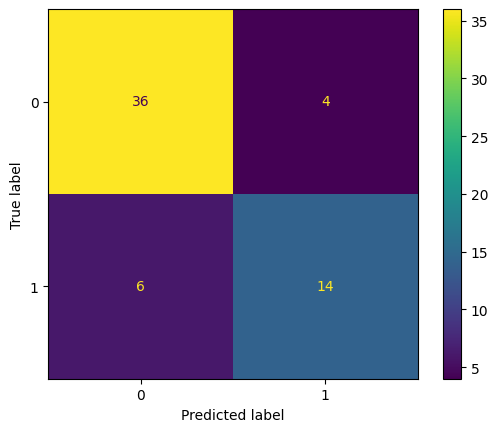

In [259]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

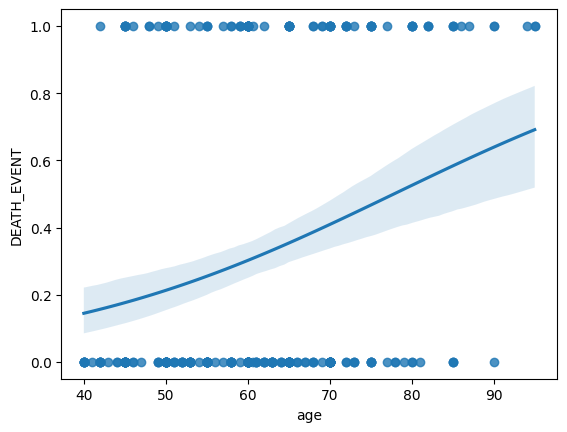

In [260]:
# Logistic Regression
sns.regplot(x='age', y='DEATH_EVENT', data=df, logistic=True)

<Axes: xlabel='serum_creatinine', ylabel='DEATH_EVENT'>

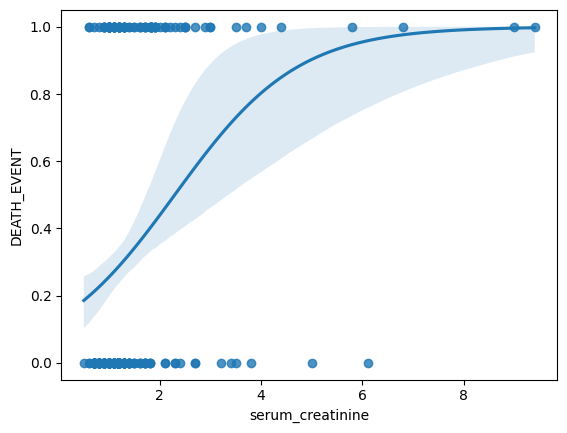

In [261]:
# Logistic Regression
sns.regplot(x='serum_creatinine', y='DEATH_EVENT', data=df, logistic=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

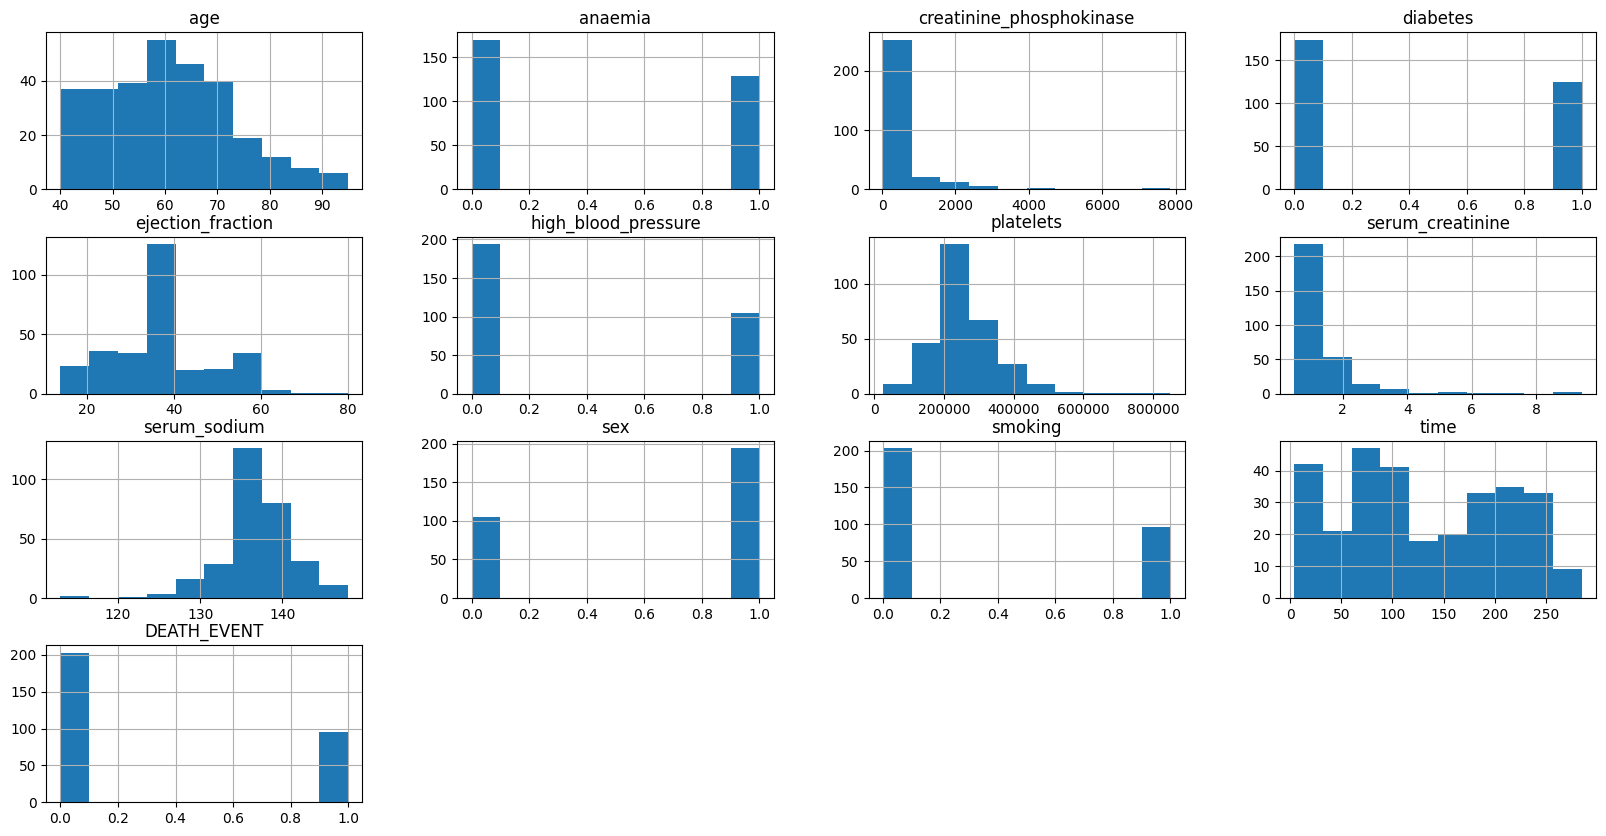

In [262]:
# Histograms
df.hist(figsize=(20, 10))

In [263]:
widgets.HTML(
    value='<h1>Heart Failure Prediction Form</h1>',
    placeholder='Heart Failure Prediction Form',
)

HTML(value='<h1>Heart Failure Prediction Form</h1>', placeholder='Heart Failure Prediction Form')

In [274]:
style = {'description_width': 'initial'}

# Form widgets
ageWidget = widgets.BoundedIntText(
    value=50,
    min=1,
    max=100,
    step=1,
    description='1) Age:',
)

anaemiaWidget = widgets.RadioButtons(
    options=['Not present', 'Present'],
    description='2) Anemia:',
    style=style,
)

creatinineWidget = widgets.IntText(
    value=100,
    description='3) Creatinine phosphokinase (mcg/L):',
    style=style,
)

diabetesWidget = widgets.RadioButtons(
    options=['Not present', 'Present'],
    description='4) Diabetes:',
    style=style,
)


ejectionWidget = widgets.IntText(
    value=50,
    description='5) Ejection fraction (%):',
    style=style,
)

pressureWidget = widgets.RadioButtons(
    options=['Not present', 'Present'],
    description='6) High blood pressure:',
    style=style,
)

plateletsWidget = widgets.IntText(
    value=500000,
    description='7) Plateletes (kiloplatelets/mL):',
    style=style,
)

serumcreatinineWidget = widgets.IntText(
    value=5,
    description='8) Serum creatinine (mg/dL):',
    style=style,
)

serumsodiumWidget = widgets.IntText(
    value=135,
    description='9) Serum sodium (mEq/L):',
    style=style,
)

genderWidget = widgets.RadioButtons(
    options=['Female', 'Male'],
    description='10) Gender:',
)

smokingWidget = widgets.RadioButtons(
    options=['Non-smoker', 'Smoker'],
    description='11) Smoking:',
)

display(ageWidget, anaemiaWidget, creatinineWidget, diabetesWidget, ejectionWidget, pressureWidget, 
        plateletsWidget, serumcreatinineWidget, serumsodiumWidget, genderWidget, smokingWidget)

# Prediction button and its output
button = widgets.Button(
    description='Predict',
    button_style='',
)

output = widgets.Output(layout={'border': '1px solid black'})

# Function processing form fields output the prediction
def make_prediction(b):
    with output:
        # Format input values to binary digits if needed
        if anaemiaWidget.value == 'Not present': anaemiaInput = 0
        else: anaemiaInput = 1

        if diabetesWidget.value == 'Not present': diabetesInput = 0
        else: diabetesInput = 1

        if pressureWidget.value == 'Not present': pressureInput = 0
        else: pressureInput = 1

        if genderWidget.value == 'Female': genderInput = 0
        else: genderInput = 1

        if smokingWidget.value == 'Non-smoker': smokingInput = 0
        else: smokingInput = 1

        # Predict the value using logistic regression model and form inputs
        values = [ageWidget.value, anaemiaInput, creatinineWidget.value, diabetesInput, ejectionWidget.value, 
                  pressureInput, plateletsWidget.value, serumcreatinineWidget.value, serumsodiumWidget.value,
                  genderInput, smokingInput, 0]
        print(values)
        prediction_num = mylog_model.predict([values])

        # Print the results to the user
        print('Prediction result value: ' + str(prediction_num))
        if prediction_num == 1: prediction_text = 'likely to have a heart failure.'
        else: prediction_text = 'unlikely to have a heart failure.'
        print('The patient will be: ' + str(prediction_text))

        # To test, can enter corresponding values below into the form (works most of the time):
        # 0 = not present, female, or non-smoker, 1 = present, male, or smoker
        # mylog_model.predict([[75,0,582,0,20,1,265000,1.9,130,1,0,4]]) # expected result: 1 - likely to have a heart failure
        # mylog_model.predict([[53,0,63,1,60,0,368000,0.8,135,1,0,22]]) # expected result: 0 - unlikely to have a heart failure

# Connect button to the prediction function and display it
button.on_click(make_prediction)
display(button, output)

BoundedIntText(value=50, description='1) Age:', min=1)

RadioButtons(description='2) Anemia:', options=('Not present', 'Present'), style=DescriptionStyle(description_…

IntText(value=100, description='3) Creatinine phosphokinase (mcg/L):', style=DescriptionStyle(description_widt…

RadioButtons(description='4) Diabetes:', options=('Not present', 'Present'), style=DescriptionStyle(descriptio…

IntText(value=50, description='5) Ejection fraction (%):', style=DescriptionStyle(description_width='initial')…

RadioButtons(description='6) High blood pressure:', options=('Not present', 'Present'), style=DescriptionStyle…

IntText(value=500000, description='7) Plateletes (kiloplatelets/mL):', style=DescriptionStyle(description_widt…

IntText(value=5, description='8) Serum creatinine (mg/dL):', style=DescriptionStyle(description_width='initial…

IntText(value=135, description='9) Serum sodium (mEq/L):', style=DescriptionStyle(description_width='initial')…

RadioButtons(description='10) Gender:', options=('Female', 'Male'), value='Female')

RadioButtons(description='11) Smoking:', options=('Non-smoker', 'Smoker'), value='Non-smoker')

Button(description='Predict', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…